## 데이터셋

이전에 3.4.1에서 사용한 __IMDB__ 데이터셋을 사용한다.


[IMDB_MIP_sigmoid.ipynb](https://github.com/Nevation/Keras/blob/master/IMDB_MIP_sigmoid.ipynb)에 데이터셋에 대한 설명이 있다.

In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

Using TensorFlow backend.


num_words=20000은 20,000번째까지 사용 빈도수가 높은 단어의 데이터셋을 가져오는 인자이다.

In [2]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

훈련셋과 검증셋을 분류하는 작업이다.

In [3]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

Data들의 길이를 맞춰주기 위해 Dataset을 전처리를 한다.

여기서 maxlen을 200으로 설정했기 때문에, 만약 Data의 길이 (문장의 길이)가 200이 안된다면, 200까지 0으로 채우고 반대로 200을 넘길 경우 자르는 작업을 한다.

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Embedding(20000, 128))
model.add(layers.LSTM(128))
model.add(layers.Dense(1, activation='sigmoid'))

모델을 설정하는 작업이다.

모델에 관련된 패키지를 import를 한 뒤, model이라는 변수에 모델을 초기화한다.

이후 LSTM모델로 세팅을 해준다.


1. LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)
    * 여기선 units만 사용했다.
    * __units__는 차원을 의미한다. 따라서 Embedding에서 인코딩된 128을 받게 된다.
    

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


이제 만든 모델에 대한 요약이다.

왼쪽에는 사용한 __Layer__, 중간에는 반환된 __Shpae__이 나오게 된다.

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

컴파일 설정을 해주는 함수이다.

__binary_crossentropy__: 두개의 클래스중에서 예측할때 사용하는 함수 (교차 엔트로피)


__adam__: Momentum과 RMSprop를 합친 경사 하강법 



__accuracy__:  다중클래스분류 문제에서 평가기준을 ‘accuracy’로 지정했을 경우 내부적으로 categorical_accuracy() 함수를 이용하여 정확도가 계산.

In [11]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 139s 7ms/step - loss: 0.3728 - acc: 0.8406 - val_loss: 0.3298 - val_acc: 0.8620
Epoch 2/25
20000/20000 [==============================] - 139s 7ms/step - loss: 0.2132 - acc: 0.9189 - val_loss: 0.3674 - val_acc: 0.8712
Epoch 3/25
20000/20000 [==============================] - 145s 7ms/step - loss: 0.1349 - acc: 0.9533 - val_loss: 0.3783 - val_acc: 0.8662
Epoch 4/25
20000/20000 [==============================] - 144s 7ms/step - loss: 0.0897 - acc: 0.9692 - val_loss: 0.4303 - val_acc: 0.8320
Epoch 5/25
20000/20000 [==============================] - 149s 7ms/step - loss: 0.0662 - acc: 0.9775 - val_loss: 0.4983 - val_acc: 0.8480
Epoch 6/25
20000/20000 [==============================] - 145s 7ms/step - loss: 0.0363 - acc: 0.9890 - val_loss: 0.5537 - val_acc: 0.8524
Epoch 7/25
20000/20000 [==============================] - 148s 7ms/step - loss: 0.0521 - acc: 0.9832 - val_loss: 0.6032 - v

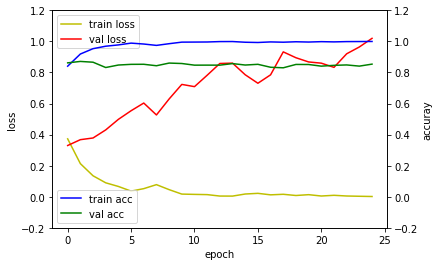

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 28s 1ms/step
## evaluation loss and_metrics ##
[1.1029088006401062, 0.8443199999809265]


## 결론

- __정확도: 84.43%__
- __손실률: 110.29%__


훈련 손실률은 초반에 큰폭 감소하다가 작은 폭으로 감소하는 모습을 보여주는 반면, 실제 테스트 손실률 는 계속 증가하는 모습을 보여주고 있다.
